In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

First of all we need to import the required libraries 

pandas,numpy, and matplotlib.pyplot are data visualisation and manipulation libraries.

tensorflow is our deeplearning library.


In [70]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' #importing the data from the link 
data_dir = tf.keras.utils.get_file(fname= 'flower_photos', origin= data_url, untar= True)

Here we are importing the required data from the web then making a directory for it on our system 

In [71]:
import pathlib

This library is used for exploring the directories both your local directories and also the directories on the web

In [72]:
data_file = pathlib.Path(data_dir)

Then we made a file to contain all our data.

In [ ]:
list(data_file.glob('*/')) #showing the files in the link 

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy')]

Here we try to see what's actually in our file we found that it contains another 5 folders each of them have a different type of flower.

In [ ]:
list(data_file.glob('*/*')) #showing all the contents of all the files 

[PosixPath('/root/.keras/datasets/flower_photos/sunflowers/6606817351_10f6e43a09.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/6125761554_4e72819ce4_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/8929274876_17efc1774a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/4977385375_e271e282f9.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/9111896677_ff0b6fa6f6_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/4804434999_bf2187e96a_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/8038712786_5bdeed3c7f_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/6482016425_d8fab362f6.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/1244774242_25a20d99a9.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/2883115609_5a69357b5d_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/23204123212_ef32fbafbe.jpg'),
 PosixPath('/root/.

This line is used to show all the images in all 5 folders we have.

In [ ]:
import PIL

This library is used to show images.

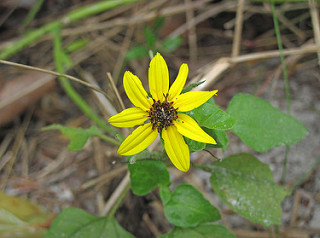

In [ ]:
PIL.Image.open(list(data_file.glob('*/*'))[500]) #used to show the images

Discovering the data.

In [118]:
#splitting the data and also splitting it to image and lable
train_ds = tf.keras.utils.image_dataset_from_directory(data_file, image_size= (180, 180), batch_size= 32, validation_split= 0.2 , subset= 'training', seed= 1)
val_ds = tf.keras.utils.image_dataset_from_directory(data_file, image_size= (180, 180), batch_size= 32, validation_split= 0.2 , subset= 'validation', seed= 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Now these 2 lines are very important as they make a lot of required 
operations on the dataset.

*  first of all it splits our dataset into 2 subsets the first one is for training and the second one is for testing, in addition to that it splits each of our subsets into images and label in them so you dont need to split them yourself.

*  It also can know completely by itself that we have 5 classes ,as it considers each folder in our data file to be a class.

* In addition to all that it rescales all the images to the same size which is (180,180),as we can't give the machine images with different shapes.

In [119]:
autotune= tf.data.AUTOTUNE     #for multi threading

In [120]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= autotune)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= autotune)

The above 2 cells are used to make the system work in parallelization, so instead of loading each image by itself when we need it we load all the images on our cache memory on the machine we are using ,so our first epoch might take some time to load all the images then it will only take a few seconds for the upcoming epochs.

In [121]:
data_augmentation = tf.keras.Sequential([ #this is used to make more than one copy from the same image to reduce the overfitting and improve the accuracy
  tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape= (180,180,3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3),
  tf.keras.layers.RandomCrop(120,120)
])

This is one of the methods to ovecome overfitting.
What this does is it takes each image and makes different copies from it by flipping rotating and zooming with a different values in each image,this adds some noise to our model so it can't just memorize all the data and give us a perfect accuracy on the training dataset but when we try the testing dataset the accuracy hits rock bottom.

In [122]:
model = tf.keras.Sequential() #the start of our model

This initializes our model.

In [123]:
model.add(data_augmentation) #first of all we add the data augmentation layer

The first layer is the data augmentation layer which we talked about earlier to make our different copies before feeding it to the machine.

In [124]:
model.add(tf.keras.layers.Rescaling(1/255,input_shape= (180,180,3))) #normalization layer 

model.add(tf.keras.layers.Conv2D(32,kernel_size= (5,5),padding= 'same',activation= 'relu')) #first conv and pooling layers to concentrate only on the important pixels of the image
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(64,kernel_size= (3,3),padding= 'same',activation= 'relu')) #second layer
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(96,kernel_size= (3,3),padding= 'same',activation= 'relu'))  #third layer
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

model.add(tf.keras.layers.Conv2D(96,kernel_size= (3,3),padding= 'same',activation= 'relu'))  #fourth layer
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

1.  The first layer is our normalization layer, so we know that each pixel has a value that ranges from 0 to 255, and we can't give that to the machine as it will prioritize the higher values, so what we do is that we rescale all the pixels values to range from 0 to 1 by dividing all the values by 255.

2.   the second layer is our first convolutional layer which has to be paired with a pooling layer after it, they have to come in the right order, so what these 2 layers do is that we know that not all the pixels of our image are very important, so these 2 layers foucses on the important pixels of the image ,this will make it easier for our model to only take the important details which will help him to differentiate between the 5 classes of flowers we have , 



In [125]:
model.add(tf.keras.layers.Flatten())   #to make the input matrix in one dimension 

so our input is like a matrix this layer is used to flatten this matrix to make it in one dimension (as a vector)

In [126]:
model.add(tf.keras.layers.Dense(512 , activation= 'relu')) #our first hidden layer 

This is our first hidden layer, the first argument is our number of neurons,the second argument is our activation function.

In [127]:
model.add(tf.keras.layers.Dropout(0.2))  #dropping out some data to minimize overfitting 

This is another method to add noise to the model to reduce overfitting as it drops some data so the model can't just memorize it, here we dropped  20% of the data.

In [128]:
#model.add(tf.keras.layers.Dense(128 , activation= 'relu')) #our first hidden layer 

This is the second hidden layer.

In [129]:
model.add(tf.keras.layers.Dense(5))

This is our final layer which is the output layer, we have 5 neurons in this layer as we have 5 classes.

In [130]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 120, 120, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 120, 120, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                

The summary gives as a final insight on our model to see if we made any mistakes.

In [131]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) , loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics = 'accuracy')
#building the model


This builds our model , the optimizers job is to change the weights to try and minimize the loss function and maximize the metrics function which is the accuracy in our case. 

In [132]:
history = model.fit(train_ds, batch_size= 32, epochs= 200, validation_data= val_ds) #training the data and also monitoring the val accuracy

Epoch 1/200
92/92 [==============================] - 8s 40ms/step - loss: 1.3495 - accuracy: 0.3958 - val_loss: 1.1841 - val_accuracy: 0.5313
Epoch 2/200
92/92 [==============================] - 2s 26ms/step - loss: 1.1376 - accuracy: 0.5266 - val_loss: 1.0397 - val_accuracy: 0.5586
Epoch 3/200
92/92 [==============================] - 2s 26ms/step - loss: 1.0447 - accuracy: 0.5800 - val_loss: 0.9634 - val_accuracy: 0.6390
Epoch 4/200
92/92 [==============================] - 2s 26ms/step - loss: 0.9723 - accuracy: 0.6076 - val_loss: 0.8722 - val_accuracy: 0.6689
Epoch 5/200
92/92 [==============================] - 3s 28ms/step - loss: 0.9196 - accuracy: 0.6366 - val_loss: 0.8283 - val_accuracy: 0.6921
Epoch 6/200
92/92 [==============================] - 2s 27ms/step - loss: 0.9106 - accuracy: 0.6427 - val_loss: 0.9058 - val_accuracy: 0.6417
Epoch 7/200
92/92 [==============================] - 2s 26ms/step - loss: 0.9126 - accuracy: 0.6413 - val_loss: 0.8505 - val_accuracy: 0.6649
Epoch 

This part here is used to actually train the model we built on the training dataset we made earlier and in the same time we monitor the accuracy of our model by using it on our validation dataset.

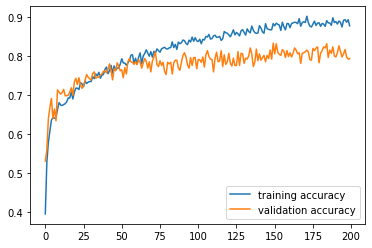

In [133]:
plt.plot(history.history['accuracy'], label= 'training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')
plt.legend(loc= 'lower right')

ploting the graph between the training accuracy and the validation accuracy to see how our model is preforming, to see if there is overfitting or underfitting and where it happened so we can fix it.

In [134]:
model.evaluate(val_ds)

23/23 [==============================] - 0s 13ms/step - loss: 0.6900 - accuracy: 0.7943


[0.6899780631065369, 0.7942779064178467]

evaluating the accuracy of our model by trying it on our validation dataset.
our goal is to minimize the loss and maximize the accuracy.

In [135]:
im = tf.keras.utils.load_img(list(data_file.glob("*/*"))[500], target_size=(180,180,3)) #loading an image from our folder

im_arr = tf.keras.utils.img_to_array(im)   #transforming it to an array 

im_tensor = tf.expand_dims(im_arr,0)  #adding another dim so i can give it to the machine 

pred = model.predict(im_tensor) #predicting the class of the image 

np.argmax(pred)  #showing the result 

0

Here we are trying to get the model to predict the class of an image we chose,
but we have to prepare the image first.

1.   First we need to load our image we used an image from our original dataset, we used the utils.load_img functoin of keras to load the image and also to reshape it to our size of (180,180).
2.   The second step was to transform this image to an array.

3. If we took a look on our model summary we will find that the input shape of our model is in 4 dimensions so we need to expand the dimensions of our image ,we will do that by using expand_dims function of tensorflow, and but the axis equal to zero to add a dimension in the beginning. 
4.   Then we used the model to predict the class of our image, and it gives us the result in the form of a probability.

5.   This last step is just to transform the probabilities of the image to be from each class to show the number of the class with the highest probaility.






In [136]:
 pip install -q -U keras_tuner

     |████████████████████████████████| 135 kB 4.8 MB/s 


This command downloads the keras tuner library.

In [137]:
import keras_tuner as kt

In [138]:
def model_builder(hp):  #making a function to build the model
  model = tf.keras.Sequential()
  model.add(data_augmentation)
  model.add(tf.keras.layers.Rescaling(1/255,input_shape= (180,180,3)))

  model.add(tf.keras.layers.Conv2D(32,kernel_size= (3,3),padding= 'same',activation= 'relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(64,kernel_size= (3,3),padding= 'same',activation= 'relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Conv2D(94,kernel_size= (3,3),padding= 'same',activation= 'relu'))
  model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))

  model.add(tf.keras.layers.Flatten())

  # try difrent values for no dense hiden layer 
  lay1 = hp.Int('units' , min_value = 16 , max_value=512 ,step=16)
  model.add(tf.keras.layers.Dense(units=lay1,activation='relu'))
  model.add(tf.keras.layers.Dropout(.2))
 
  model.add(tf.keras.layers.Dense(5))

  hp_learning_rate = hp.Choice('learning_rate' , values = [.01,.001,.0001,.00001] )
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=hp_learning_rate, beta_1=0.9, beta_2=0.999) , loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = 'accuracy')

  return model

Making a function to build our model and also giving it the values of the parameters we want to try.

In [139]:
tuner = kt.Hyperband(hypermodel= model_builder ,objective= 'val_accuracy', max_epochs= 50) #building the hp tuner 

This is our hyperparameter tuner, the goal of this tuner is instead of manually trying each paramter ourself which will be a time consuming process we give the tuner the parameters we want to try and he does that for us then give us the best combination of parameters for our model.

In [140]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience= 5)  #a method to limit the overfitting 

The early stopping function is just another method to stop overfitting.

In [ ]:
from gc import callbacks
tuner.search(train_ds,epochs= 10, validation_data= val_ds, callbacks= [stop_early])  #searching for the best hyperparamters

Initiating the tuner.